<a href="https://colab.research.google.com/github/Jayasvisajja/mlproject/blob/main/Zomato_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Load the dataset
file_path = "/content/Zomato data .csv"
df = pd.read_csv(file_path)

# Display basic information about the dataset
df.info(), df.head()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         148 non-null    object
 1   online_order                 148 non-null    object
 2   book_table                   148 non-null    object
 3   rate                         148 non-null    object
 4   votes                        148 non-null    int64 
 5   approx_cost(for two people)  148 non-null    int64 
 6   listed_in(type)              148 non-null    object
dtypes: int64(2), object(5)
memory usage: 8.2+ KB


(None,
                     name online_order book_table   rate  votes  \
 0                  Jalsa          Yes        Yes  4.1/5    775   
 1         Spice Elephant          Yes         No  4.1/5    787   
 2        San Churro Cafe          Yes         No  3.8/5    918   
 3  Addhuri Udupi Bhojana           No         No  3.7/5     88   
 4          Grand Village           No         No  3.8/5    166   
 
    approx_cost(for two people) listed_in(type)  
 0                          800          Buffet  
 1                          800          Buffet  
 2                          800          Buffet  
 3                          300          Buffet  
 4                          600          Buffet  )

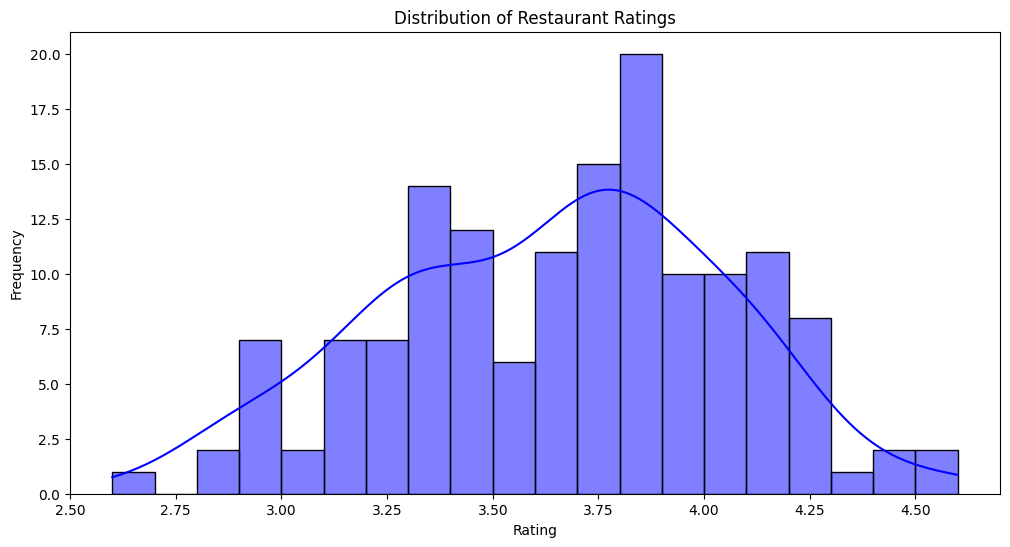

<ipython-input-28-7c0036b871ac>:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df["online_order"].value_counts().index, y=df["online_order"].value_counts(), palette='coolwarm')


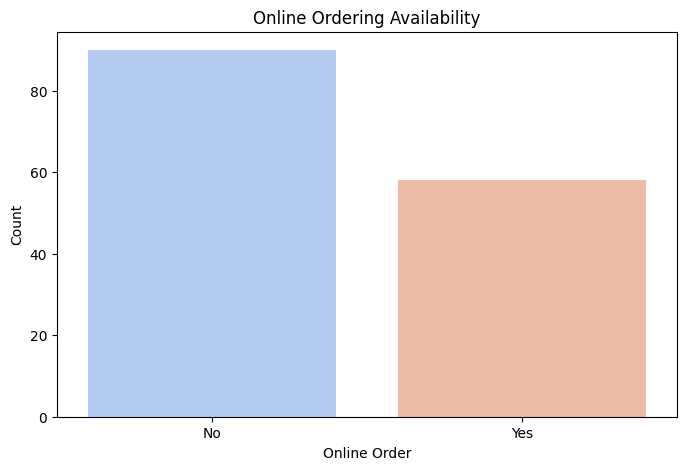

<ipython-input-28-7c0036b871ac>:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df["book_table"].value_counts().index, y=df["book_table"].value_counts(), palette='coolwarm')


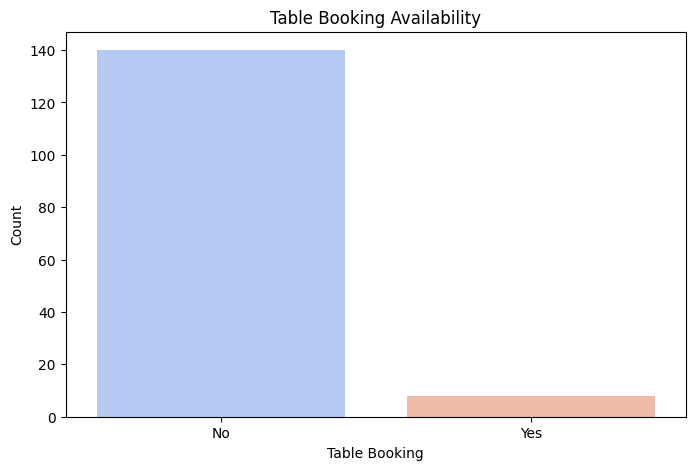

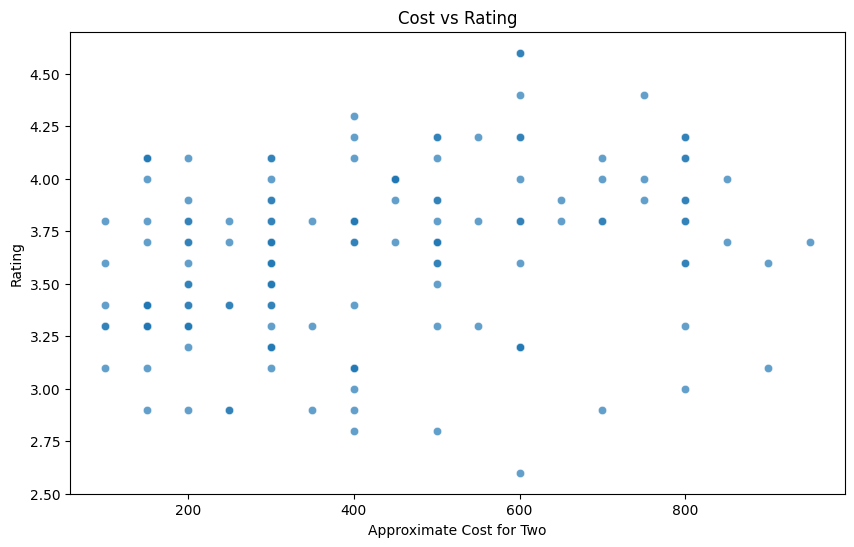

Average Rating:
3.6331081081081082

Highest Rated Restaurants:
      name  rate
7   Onesta   4.6
44  Onesta   4.6

Lowest Rated Restaurants:
               name  rate
94  Nandhini Deluxe   2.6

Online Order Percentage:
{'No': 60.810810810810814, 'Yes': 39.189189189189186}

Table Booking Percentage:
{'No': 94.5945945945946, 'Yes': 5.405405405405405}

Average Rating (Online Order):
{'No': 3.4877777777777776, 'Yes': 3.8586206896551722}

Average Rating (Table Booking):
{'No': 3.6014285714285714, 'Yes': 4.1875}

Average Cost for Two:
418.2432432432432

Cost vs Rating Correlation:
0.27521574616074296



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Rename columns for easier access
df.rename(columns={"approx_cost(for two people)": "approx_cost_for_two", "listed_in(type)": "restaurant_type"}, inplace=True)

# Convert 'rate' column to numerical values
df["rate"] = df["rate"].str.replace("/5", "").astype(float)

# 1. Rating Analysis
average_rating = df["rate"].mean()
highest_rated = df[df["rate"] == df["rate"].max()][["name", "rate"]]
lowest_rated = df[df["rate"] == df["rate"].min()][["name", "rate"]]

# 2. Online Ordering & Table Booking Trends
online_order_percentage = (df["online_order"].value_counts(normalize=True) * 100).to_dict()
book_table_percentage = (df["book_table"].value_counts(normalize=True) * 100).to_dict()

# Average rating for restaurants with and without online ordering
avg_rating_online = df.groupby("online_order")["rate"].mean().to_dict()
avg_rating_table_booking = df.groupby("book_table")["rate"].mean().to_dict()

# 3. Cost Analysis
average_cost = df["approx_cost_for_two"].mean()

# Correlation between cost and rating
correlation_cost_rating = df[["approx_cost_for_two", "rate"]].corr().iloc[0,1]

# Visualization
plt.figure(figsize=(12,6))
sns.histplot(df["rate"], bins=20, kde=True, color='blue')
plt.title("Distribution of Restaurant Ratings")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(8,5))
sns.barplot(x=df["online_order"].value_counts().index, y=df["online_order"].value_counts(), palette='coolwarm')
plt.title("Online Ordering Availability")
plt.xlabel("Online Order")
plt.ylabel("Count")
plt.show()

plt.figure(figsize=(8,5))
sns.barplot(x=df["book_table"].value_counts().index, y=df["book_table"].value_counts(), palette='coolwarm')
plt.title("Table Booking Availability")
plt.xlabel("Table Booking")
plt.ylabel("Count")
plt.show()

plt.figure(figsize=(10,6))
sns.scatterplot(x=df["approx_cost_for_two"], y=df["rate"], alpha=0.7)
plt.title("Cost vs Rating")
plt.xlabel("Approximate Cost for Two")
plt.ylabel("Rating")
plt.show()

# Display results
results = {
    "Average Rating": average_rating,
    "Highest Rated Restaurants": highest_rated,
    "Lowest Rated Restaurants": lowest_rated,
    "Online Order Percentage": online_order_percentage,
    "Table Booking Percentage": book_table_percentage,
    "Average Rating (Online Order)": avg_rating_online,
    "Average Rating (Table Booking)": avg_rating_table_booking,
    "Average Cost for Two": average_cost,
    "Cost vs Rating Correlation": correlation_cost_rating
}

for key, value in results.items():
    print(f"{key}:\n{value}\n")


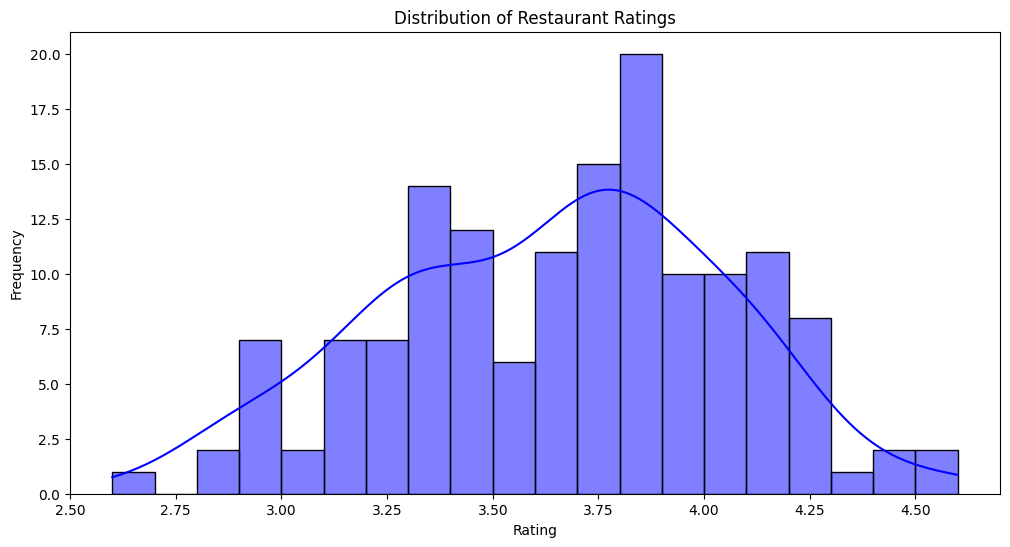

<ipython-input-31-598623c47a17>:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["online_order"], palette='coolwarm')


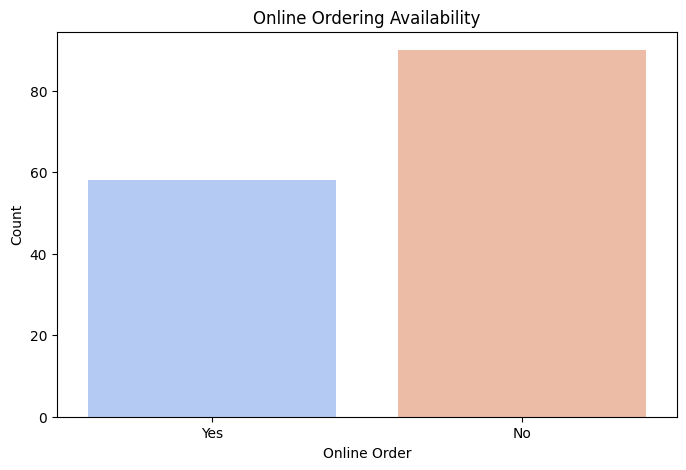

<ipython-input-31-598623c47a17>:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["book_table"], palette='coolwarm')


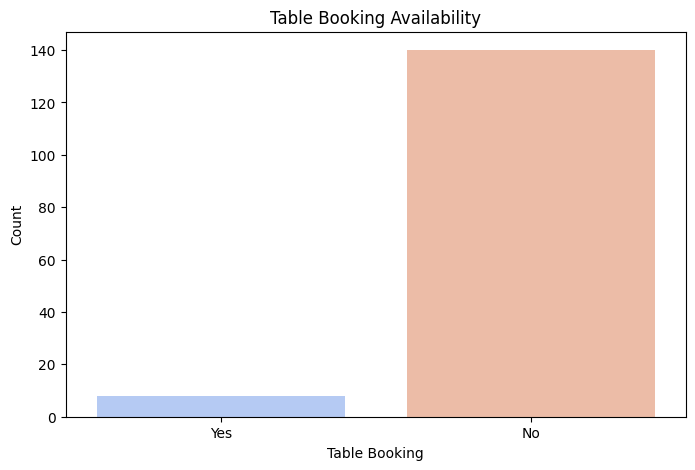

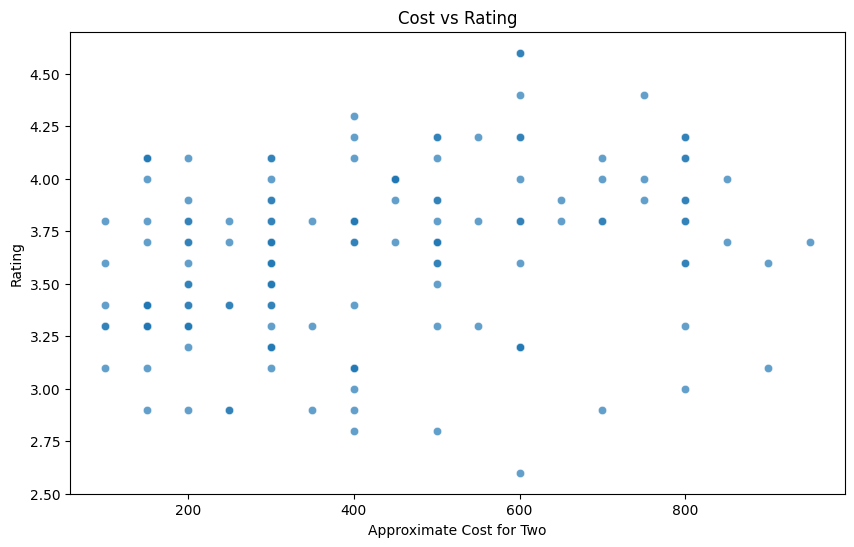

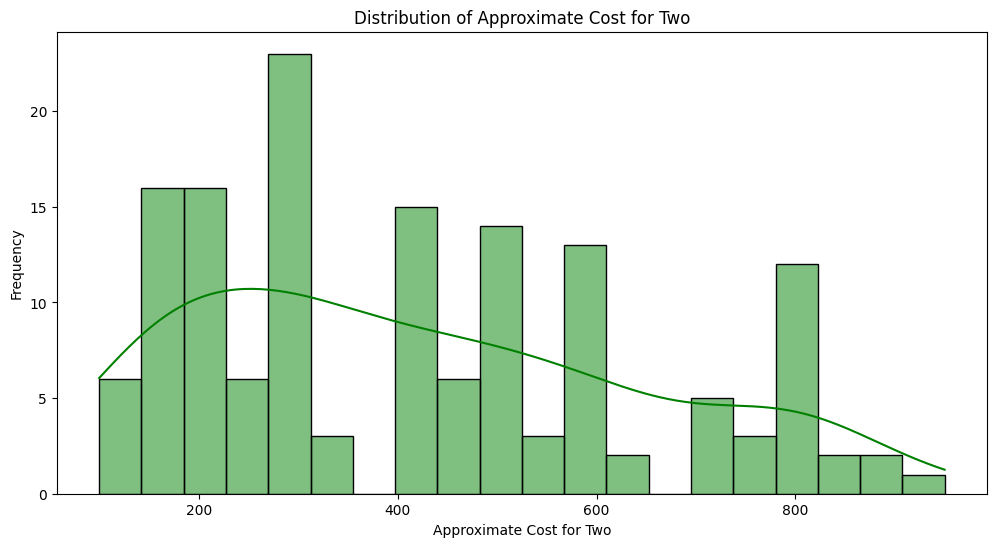

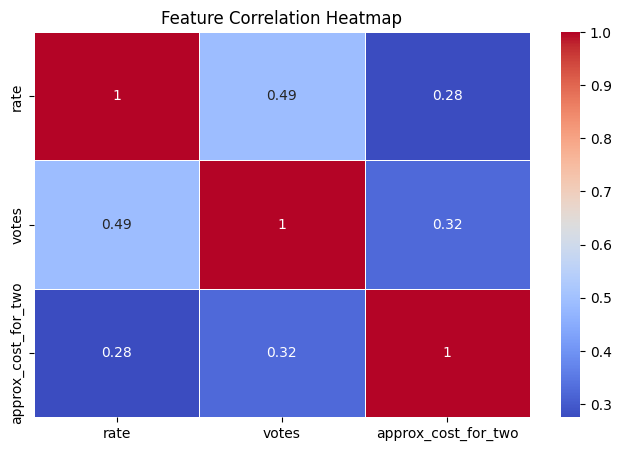

<ipython-input-31-598623c47a17>:85: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_voted["name"], x=top_voted["votes"], palette='magma')


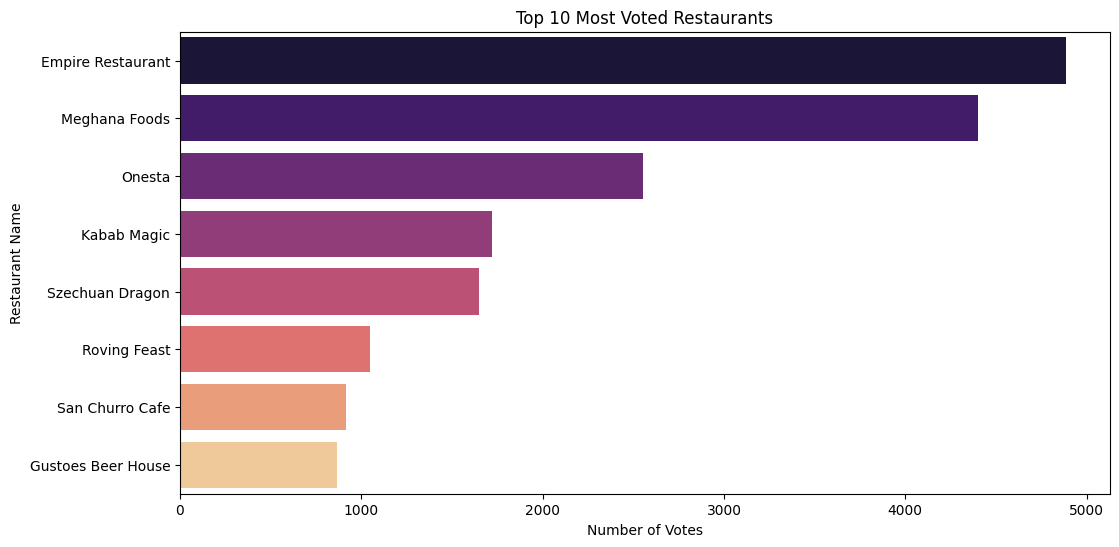

Average Rating:
3.6331081081081082

Highest Rated Restaurants:
      name  rate
7   Onesta   4.6
44  Onesta   4.6

Lowest Rated Restaurants:
               name  rate
94  Nandhini Deluxe   2.6

Online Order Percentage:
{'No': 60.810810810810814, 'Yes': 39.189189189189186}

Table Booking Percentage:
{'No': 94.5945945945946, 'Yes': 5.405405405405405}

Average Rating (Online Order):
{'No': 3.4877777777777776, 'Yes': 3.8586206896551722}

Average Rating (Table Booking):
{'No': 3.6014285714285714, 'Yes': 4.1875}

Average Cost for Two:
418.2432432432432

Cost vs Rating Correlation:
0.27521574616074296



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np



# Rename columns for easier access
df.rename(columns={"approx_cost(for two people)": "approx_cost_for_two", "listed_in(type)": "restaurant_type"}, inplace=True)

# Ensure 'rate' column is of type string before applying string operations
df["rate"] = df["rate"].astype(str).str.replace("/5", "").replace("NEW", np.nan)
df["rate"] = pd.to_numeric(df["rate"], errors='coerce')

# Convert 'approx_cost_for_two' to numeric, handling commas
df["approx_cost_for_two"] = df["approx_cost_for_two"].astype(str).str.replace(",", "").astype(float)

# 1. Rating Analysis
average_rating = df["rate"].mean()
highest_rated = df[df["rate"] == df["rate"].max()][["name", "rate"]]
lowest_rated = df[df["rate"] == df["rate"].min()][["name", "rate"]]

# Rating Distribution
plt.figure(figsize=(12,6))
sns.histplot(df["rate"].dropna(), bins=20, kde=True, color='blue')
plt.title("Distribution of Restaurant Ratings")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()

# 2. Online Ordering & Table Booking Trends
online_order_percentage = (df["online_order"].value_counts(normalize=True) * 100).to_dict()
book_table_percentage = (df["book_table"].value_counts(normalize=True) * 100).to_dict()

# Average rating for restaurants with and without online ordering
avg_rating_online = df.groupby("online_order")["rate"].mean().to_dict()
avg_rating_table_booking = df.groupby("book_table")["rate"].mean().to_dict()

# Online Order and Table Booking Analysis
plt.figure(figsize=(8,5))
sns.countplot(x=df["online_order"], palette='coolwarm')
plt.title("Online Ordering Availability")
plt.xlabel("Online Order")
plt.ylabel("Count")
plt.show()

plt.figure(figsize=(8,5))
sns.countplot(x=df["book_table"], palette='coolwarm')
plt.title("Table Booking Availability")
plt.xlabel("Table Booking")
plt.ylabel("Count")
plt.show()

# 3. Cost Analysis
average_cost = df["approx_cost_for_two"].mean()

# Cost vs Rating Analysis
correlation_cost_rating = df[["approx_cost_for_two", "rate"]].corr().iloc[0,1]

plt.figure(figsize=(10,6))
sns.scatterplot(x=df["approx_cost_for_two"], y=df["rate"], alpha=0.7)
plt.title("Cost vs Rating")
plt.xlabel("Approximate Cost for Two")
plt.ylabel("Rating")
plt.show()

# Cost Distribution Analysis
plt.figure(figsize=(12,6))
sns.histplot(df["approx_cost_for_two"].dropna(), bins=20, kde=True, color='green')
plt.title("Distribution of Approximate Cost for Two")
plt.xlabel("Approximate Cost for Two")
plt.ylabel("Frequency")
plt.show()

# Correlation Heatmap (handling non-numeric columns)
numeric_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(8,5))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

# Top 10 Most Voted Restaurants
top_voted = df.sort_values(by="votes", ascending=False).head(10)
plt.figure(figsize=(12,6))
sns.barplot(y=top_voted["name"], x=top_voted["votes"], palette='magma')
plt.title("Top 10 Most Voted Restaurants")
plt.xlabel("Number of Votes")
plt.ylabel("Restaurant Name")
plt.show()

# Display results
results = {
    "Average Rating": average_rating,
    "Highest Rated Restaurants": highest_rated,
    "Lowest Rated Restaurants": lowest_rated,
    "Online Order Percentage": online_order_percentage,
    "Table Booking Percentage": book_table_percentage,
    "Average Rating (Online Order)": avg_rating_online,
    "Average Rating (Table Booking)": avg_rating_table_booking,
    "Average Cost for Two": average_cost,
    "Cost vs Rating Correlation": correlation_cost_rating
}

for key, value in results.items():
    print(f"{key}:\n{value}\n")
